In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

print("TensorFlow versão:", tf.__version__)

TensorFlow versão: 2.19.0


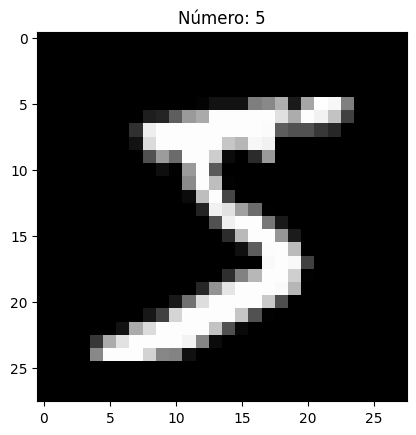

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Número: {y_train[0]}")
plt.show()

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9793 - loss: 0.0640
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9804 - loss: 0.0586
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0518
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9840 - loss: 0.0462
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9865 - loss: 0.0415


313/313 - 1s - 2ms/step - accuracy: 0.9791 - loss: 0.0714

Precisão nos dados de teste: 97.91%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
A IA acha que o primeiro número do teste é: 7


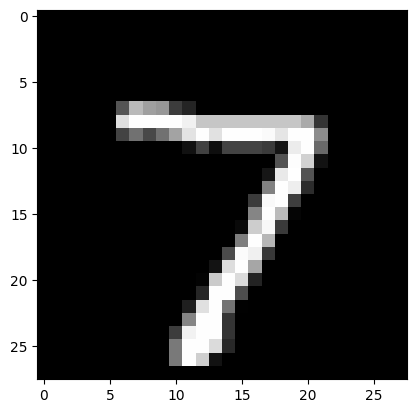

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'\nPrecisão nos dados de teste: {test_acc*100:.2f}%')

previsao = model.predict(x_test)
print(f"A IA acha que o primeiro número do teste é: {previsao[0].argmax()}")
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [ ]:
import numpy as np

previsoes = model.predict(x_test)
previsoes_labels = np.argmax(previsoes, axis=1)

erros = np.where(previsoes_labels != y_test)[0]

plt.figure(figsize=(10, 5))
for i, indice in enumerate(erros[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[indice], cmap='gray')
    plt.title(f"Real: {y_test[indice]}\nIA disse: {previsoes_labels[indice]}")
    plt.axis('off')
plt.show()